In [11]:
from General_Code import *
from pathlib import Path

In [12]:

# Define the relative path to the TDMS file
relative_path = Path("data/Flix_data/15 xPosition 22500 yPosition -4500.tdms")

# Get the current working directory
script_dir = Path.cwd()

# Combine the current working directory with the relative path
tdms_file_path = script_dir / relative_path
st_pot = 0.21  # V
offset_pot = 0  # V
# Define the pH
ph = 1
# Define the capillary diameter
d_cap = 1150  # nm
# Define the sweep to keep from the voltammograms
sweep = 7  # beginns at 1
apr_shift = 0 # apr_shift in case of Flix will be 0

In [13]:
datatree =load_tdms (tdms_file_path, ph, d_cap, offset_pot, st_pot, apr_shift)
print(datatree)

DataTree('None', parent=None)
    Dimensions:         (time: 1101)
    Coordinates:
      * time            (time) float64 9kB 42.18 42.19 42.2 ... 63.23 63.24 63.24
    Data variables:
        Potential       (time) float64 9kB -0.6047 -0.5639 ... 0.0807 0.08894
        CurrentDensity  (time) float64 9kB -2.443 -2.386 ... -0.004701 -0.00382
        X_um            (time) float64 9kB 0.1648 0.1648 0.1648 ... 0.1648 0.1648
        Y_um            (time) float64 9kB 0.1892 0.1892 0.1892 ... 10.08 10.08
        SweepNumber     (time) int64 9kB 1 1 1 1 1 1 1 1 1 1 ... 8 8 8 8 8 8 8 8 8 8
        MeasNumber      (time) int64 9kB 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 4 4
    Attributes:
        filename:               15 xPosition 22500 yPosition -4500.tdms
        pH:                     1
        capillary_diameter_nm:  1150
        capillary_area_cm2:     1.0386890710931252e-08
        offset_potential_V:     0
        standard_potential_V:   0.21
        approach_shift:         0
     

In [14]:
df = datatree.ds.to_dataframe()
df

,Potential,CurrentDensity,X_um,Y_um,SweepNumber,MeasNumber
time,,,,,,
42.183075,-0.604745,-2.442799,0.1648,0.189215,1,1
42.191270,-0.563850,-2.386386,0.1648,0.189215,1,1
42.199465,-0.522650,-2.324685,0.1648,0.189215,1,1
42.207660,-0.481755,-2.252112,0.1648,0.189215,1,1
42.215855,-0.440861,-2.171312,0.1648,0.189215,1,1
...,...,...,...,...,...,...
63.211637,0.056286,-0.007933,0.1648,10.077212,8,4
63.219832,0.064526,-0.006464,0.1648,10.083316,8,4
63.228027,0.072766,-0.005583,0.1648,10.077212,8,4


In [15]:
datatree.ds

<xarray.DatasetView> Size: 62kB
Dimensions:         (time: 1101)
Coordinates:
  * time            (time) float64 9kB 42.18 42.19 42.2 ... 63.23 63.24 63.24
Data variables:
    Potential       (time) float64 9kB -0.6047 -0.5639 ... 0.0807 0.08894
    CurrentDensity  (time) float64 9kB -2.443 -2.386 ... -0.004701 -0.00382
    X_um            (time) float64 9kB 0.1648 0.1648 0.1648 ... 0.1648 0.1648
    Y_um            (time) float64 9kB 0.1892 0.1892 0.1892 ... 10.08 10.08
    SweepNumber     (time) int64 9kB 1 1 1 1 1 1 1 1 1 1 ... 8 8 8 8 8 8 8 8 8 8
    MeasNumber      (time) int64 9kB 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 4 4
Attributes:
    filename:               15 xPosition 22500 yPosition -4500.tdms
    pH:                     1
    capillary_diameter_nm:  1150
    capillary_area_cm2:     1.0386890710931252e-08
    offset_potential_V:     0
    standard_potential_V:   0.21
    approach_shift:         0
    num_sweeps:             8

In [16]:
lsvs=extract_lsvs(datatree, sweep=7,rem_hop_areas=1)

In [17]:
lsvs

DataTree('None', parent=None)
    Dimensions:                           (Potential: 84)
    Coordinates:
      * Potential                         (Potential) float64 672B -0.5947 ... 0....
    Data variables:
        Area_2.0                          (Potential) float64 672B -2.214 ... 0.0...
        Area_3.0                          (Potential) float64 672B -2.205 ... 0.0...
        Area_4.0                          (Potential) float64 672B -2.191 ... 0.0...
        Average Current density [A/cm^2]  (Potential) float64 672B -2.203 ... 0.0...
    Attributes:
        sweep:                    7
        removed_hop_areas:        [1]
        interpolated_potentials:  [-0.59467382 -0.58643382 -0.57819382 -0.5699538...

In [18]:
lsvs.ds.to_dataframe()

,Area_2.0,Area_3.0,Area_4.0,Average Current density [A/cm^2]
Potential,,,,
-0.594674,-2.214209,-2.204513,-2.190998,-2.203240
-0.586434,-2.210683,-2.202456,-2.185709,-2.199616
-0.578194,-2.203338,-2.199224,-2.180714,-2.194425
-0.569954,-2.198637,-2.195405,-2.176307,-2.190116
-0.561714,-2.196765,-2.194338,-2.173521,-2.188208
...,...,...,...,...
0.056286,-0.013911,-0.008159,-0.019155,-0.013742
0.064526,-0.009957,-0.004505,-0.015409,-0.009957
0.072766,-0.005125,0.000555,-0.010545,-0.005038


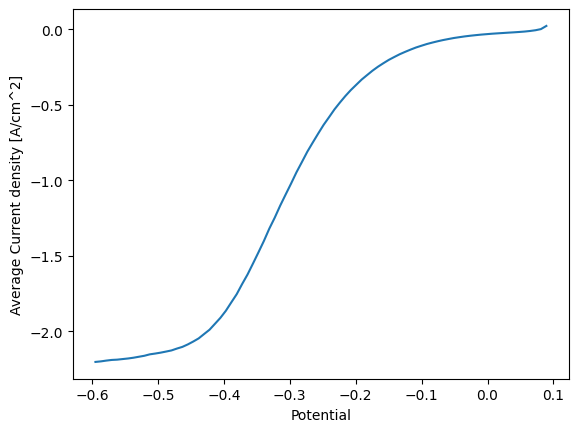

In [19]:
df_lsvs=lsvs.ds.to_dataframe()
plt.plot(df_lsvs.index, df_lsvs['Average Current density [A/cm^2]'])
plt.xlabel('Potential')
plt.ylabel('Average Current density [A/cm^2]')
plt.show()

# SECCM Alejandro

In [20]:

# Define the relative path to the TDMS file
relative_path = Path("data/Alejandro_data/20230627_PtSiO2_36_21_1.5_0.6_CV.tdms")
# Combine the current working directory with the relative path
tdms_file_path = script_dir / relative_path
st_pot = 0.205  # V
offset_pot = 0  # V
# Define the pH
ph = 4
# Define the capillary diameter
d_cap = 610  # nm
# Define the sweep to keep from the voltammograms
sweep =5  # beginns at 1
apr_shift = 1 # apr_shift in case of Alejandro will be 1

In [21]:

datatree = load_tdms (tdms_file_path, ph, d_cap, offset_pot, st_pot, apr_shift)
print(datatree)

DataTree('None', parent=None)
    Dimensions:         (time: 834889)
    Coordinates:
      * time            (time) float64 7MB 93.25 93.25 93.26 ... 2.36e+03 2.36e+03
    Data variables:
        Potential       (time) float64 7MB 0.1919 0.1958 0.1999 ... 1.251 1.255
        CurrentDensity  (time) float64 7MB 0.0004008 0.001709 ... 0.01299 0.01319
        X_um            (time) float64 7MB 32.0 32.0 32.0 32.0 ... 68.01 68.01 68.01
        Y_um            (time) float64 7MB 59.5 59.5 59.5 59.5 ... 80.5 80.5 80.5
        SweepNumber     (time) int64 7MB 1 1 1 1 1 1 1 1 1 1 ... 8 8 8 8 8 8 8 8 8 8
        MeasNumber      (time) int64 7MB 1 1 1 1 1 1 1 ... 375 375 375 375 375 375
    Attributes:
        filename:               20230627_PtSiO2_36_21_1.5_0.6_CV.tdms
        pH:                     4
        capillary_diameter_nm:  610
        capillary_area_cm2:     2.9224665660019048e-09
        offset_potential_V:     0
        standard_potential_V:   0.205
        approach_shift:        

In [22]:
df = datatree.ds.to_dataframe()
df

,Potential,CurrentDensity,X_um,Y_um,SweepNumber,MeasNumber
time,,,,,,
93.251521,0.191880,0.000401,32.002335,59.502430,1,1
93.253585,0.195766,0.001709,32.001629,59.501476,1,1
93.255649,0.199894,0.002496,32.002010,59.501781,1,1
93.257713,0.204021,0.002858,32.001429,59.501905,1,1
93.259777,0.208150,0.002989,32.002134,59.501982,1,1
...,...,...,...,...,...,...
2359.831057,1.238610,0.012657,68.004742,80.502100,8,375
2359.833121,1.242739,0.012853,68.004742,80.502748,8,375
2359.835185,1.246866,0.013030,68.005171,80.503302,8,375


In [23]:
lsvs=extract_lsvs(datatree, sweep)

In [24]:
lsvs_df= lsvs.ds.to_dataframe()
lsvs_df

,Area_1.0,Area_2.0,Area_3.0,Area_4.0,Area_5.0,Area_6.0,Area_7.0,Area_8.0,Area_9.0,Area_10.0,...,Area_367.0,Area_368.0,Area_369.0,Area_370.0,Area_371.0,Area_372.0,Area_373.0,Area_374.0,Area_375.0,Average Current density [A/cm^2]
Potential,,,,,,,,,,,,,,,,,,,,,
-0.076624,NaN,-0.019093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.018979,-0.019040,NaN,NaN,NaN,NaN,-0.018935
-0.072496,-0.017874,-0.019100,-0.018487,-0.018308,-0.018797,-0.018485,-0.018005,-0.018394,-0.018316,-0.018673,...,-0.019300,-0.018971,-0.018628,-0.018919,-0.019011,-0.019335,-0.018722,-0.017800,-0.018536,-0.018727
-0.068369,-0.017809,-0.018825,-0.018362,-0.018207,-0.018650,-0.018370,-0.017862,-0.018190,-0.018183,-0.018486,...,-0.019171,-0.018826,-0.018550,-0.018708,-0.018927,-0.019277,-0.018500,-0.017659,-0.018472,-0.018609
-0.064241,-0.017791,-0.018717,-0.018222,-0.018148,-0.018488,-0.018246,-0.017670,-0.018084,-0.018108,-0.018419,...,-0.019046,-0.018717,-0.018411,-0.018675,-0.018803,-0.019106,-0.018446,-0.017558,-0.018253,-0.018479
-0.060114,-0.017693,-0.018466,-0.018124,-0.018035,-0.018347,-0.018166,-0.017557,-0.017941,-0.017842,-0.018299,...,-0.018915,-0.018607,-0.018273,-0.018578,-0.018607,-0.018963,-0.018229,-0.017287,-0.018244,-0.018345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.240049,0.008905,0.007784,0.008057,0.008575,0.008292,0.007711,0.006128,0.006005,0.006952,0.007902,...,0.008695,0.008572,0.008634,0.009081,0.008354,0.008361,0.006379,0.006908,0.007424,0.007660
1.244177,0.009751,0.008462,0.008874,0.009578,0.009261,0.008629,0.006587,0.006463,0.007598,0.008506,...,0.009678,0.009504,0.009473,0.010061,0.009205,0.009246,0.006963,0.007575,0.008188,0.008467
1.248304,0.010605,0.009453,0.009845,0.010704,0.010208,0.009403,0.007295,0.006989,0.008372,0.009290,...,0.010793,0.010585,0.010536,0.011124,0.010218,0.010110,0.007639,0.008456,0.008934,0.009390


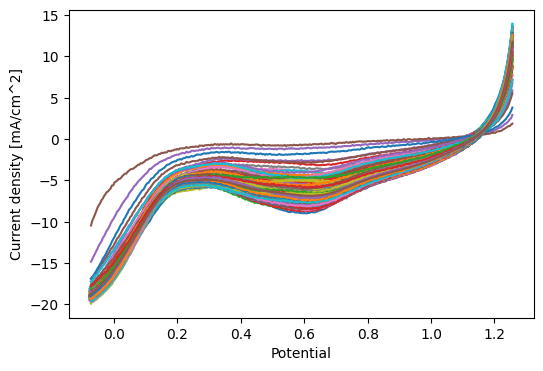

In [25]:
df_without_last = lsvs_df

plt.figure(figsize=(6, 4))
for column in df_without_last.columns:
    
    plt.plot(lsvs_df.index, df_without_last[column]*1e3, label=column)

plt.xlabel('Potential')
plt.ylabel("Current density [mA/cm^2]")
plt.show()